# Pandas Date and Time

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd

## Working with Timestamp

For points in time, Pandas provides the `Timestamp` type. 

It is a replacement for Python's native `datetime`, but is based on the more efficient `numpy.datetime64` data type. 

You can create a simple date time as a `Timestamp` using the Pandas `to_datetime` functions which takes a string to parse:

In [2]:
date = pd.to_datetime("14th of October, 2018")
date

Timestamp('2018-10-14 00:00:00')

You can also use the Timestamp constructor directly

In [3]:
date = pd.Timestamp(year=2018, month=10, day=14, hour=12, minute=0, second=30)
python_datetime = date.to_pydatetime()
print(date)
print(type(date))
print(python_datetime)
print(type(python_datetime))

2018-10-14 12:00:30
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-10-14 12:00:30
<class 'datetime.datetime'>


There are multiple attributes that let you access the information stored in a Timestamp object. 

You can find the full list here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html#pandas.Timestamp

In [4]:
print(date.day)
print(date.dayofyear)
print(date.week)
print(date.month)
print(date.year)
print(date.hour)
print(date.minute)
print(date.second)

14
287
41
10
2018
12
0
30


## Working with Time Series

In [5]:
datetimes = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])

In [6]:
datetimes

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)

In [7]:
data = pd.Series([10, 4, 14, 30], index=datetimes)

In [8]:
data

2014-07-04    10
2014-08-04     4
2015-07-04    14
2015-08-04    30
dtype: int64

In [9]:
data['2015']

2015-07-04    14
2015-08-04    30
dtype: int64

In [10]:
type(data)

pandas.core.series.Series

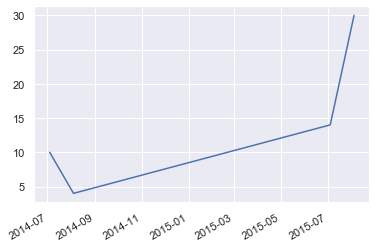

In [11]:
data.plot();

### Create a range of dates
You can simple create a range of dates by providing two dates interval. By default, the interval is one day.

In [13]:
dates = pd.date_range('2015-07-03', '2015-07-10')
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

You can also be more specific by deciding how many periods and what unit to use for the frequency. E.g. here `W` means week.

In [14]:
weeks = pd.date_range('2018 Oct 1', periods = 10, freq = 'W')
weeks

DatetimeIndex(['2018-10-07', '2018-10-14', '2018-10-21', '2018-10-28',
               '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25',
               '2018-12-02', '2018-12-09'],
              dtype='datetime64[ns]', freq='W-SUN')

### Timedelta

Pandas allow you to do arithmetic which returns deltas:

In [15]:
weeks - weeks[0]

TimedeltaIndex([ '0 days',  '7 days', '14 days', '21 days', '28 days',
                '35 days', '42 days', '49 days', '56 days', '63 days'],
               dtype='timedelta64[ns]', freq=None)

## Exercises

Let's look at some historical stock data for Google. This will be represented as a time series by date.

Note that we must set the `Date` column as the `index`, and use `parse_dates=True` to create a `DatetimeIndex`.

In [16]:
goog = pd.read_csv('data/goog.csv', index_col="Date", parse_dates=True)
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,789.630005,775.799988,778.809998,786.140015,1657300,786.140015
2017-01-04,791.340027,783.159973,788.359985,786.900024,1073000,786.900024
2017-01-05,794.479980,785.020020,786.080017,794.020020,1335200,794.020020
2017-01-06,807.900024,792.203979,795.260010,806.150024,1640200,806.150024
2017-01-09,809.966003,802.830017,806.400024,806.650024,1274600,806.650024


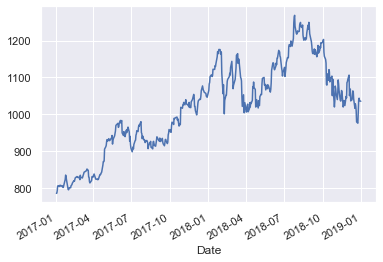

In [17]:
goog['Close'].plot();

### Find the date for the highest closing price in 2018

In [50]:
#goog['Close']['2018'].argmax()
goog['2018'].iloc[goog['Close']['2018'].argmax()]

High         1.269771e+03
Low          1.249020e+03
Open         1.251000e+03
Close        1.268330e+03
Volume       2.405600e+06
Adj Close    1.268330e+03
Name: 2018-07-26 00:00:00, dtype: float64

### Find the median closing price in 2018

In [22]:
goog['Close']['2018'].median()

1103.97998046875

### Find the average closing prince in July 2018

In [24]:
goog['Close']['2018 July'].mean()

1187.5904715401787

## Timezones

In [25]:
london = pd.Timestamp.now(tz="Europe/London")
brussels = london.tz_convert("Europe/Brussels")
print(london)
print(brussels)

2020-03-28 11:06:51.890920+00:00
2020-03-28 12:06:51.890920+01:00
